In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import xgboost as xgb
from xgboost import XGBClassifier
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [4]:
df = pd.read_csv('./Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
country_mapper  = {
    "France": 1,
    "Spain": 2,
    "Germany": 3
}
df['country'] = df["country"].replace(country_mapper)

In [6]:
gender_mapper = {
    "Male":1,
    "Female":0
}

df["gender"] = df["gender"].replace(gender_mapper)

In [7]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [9]:
correlation_matrix = df.corr()

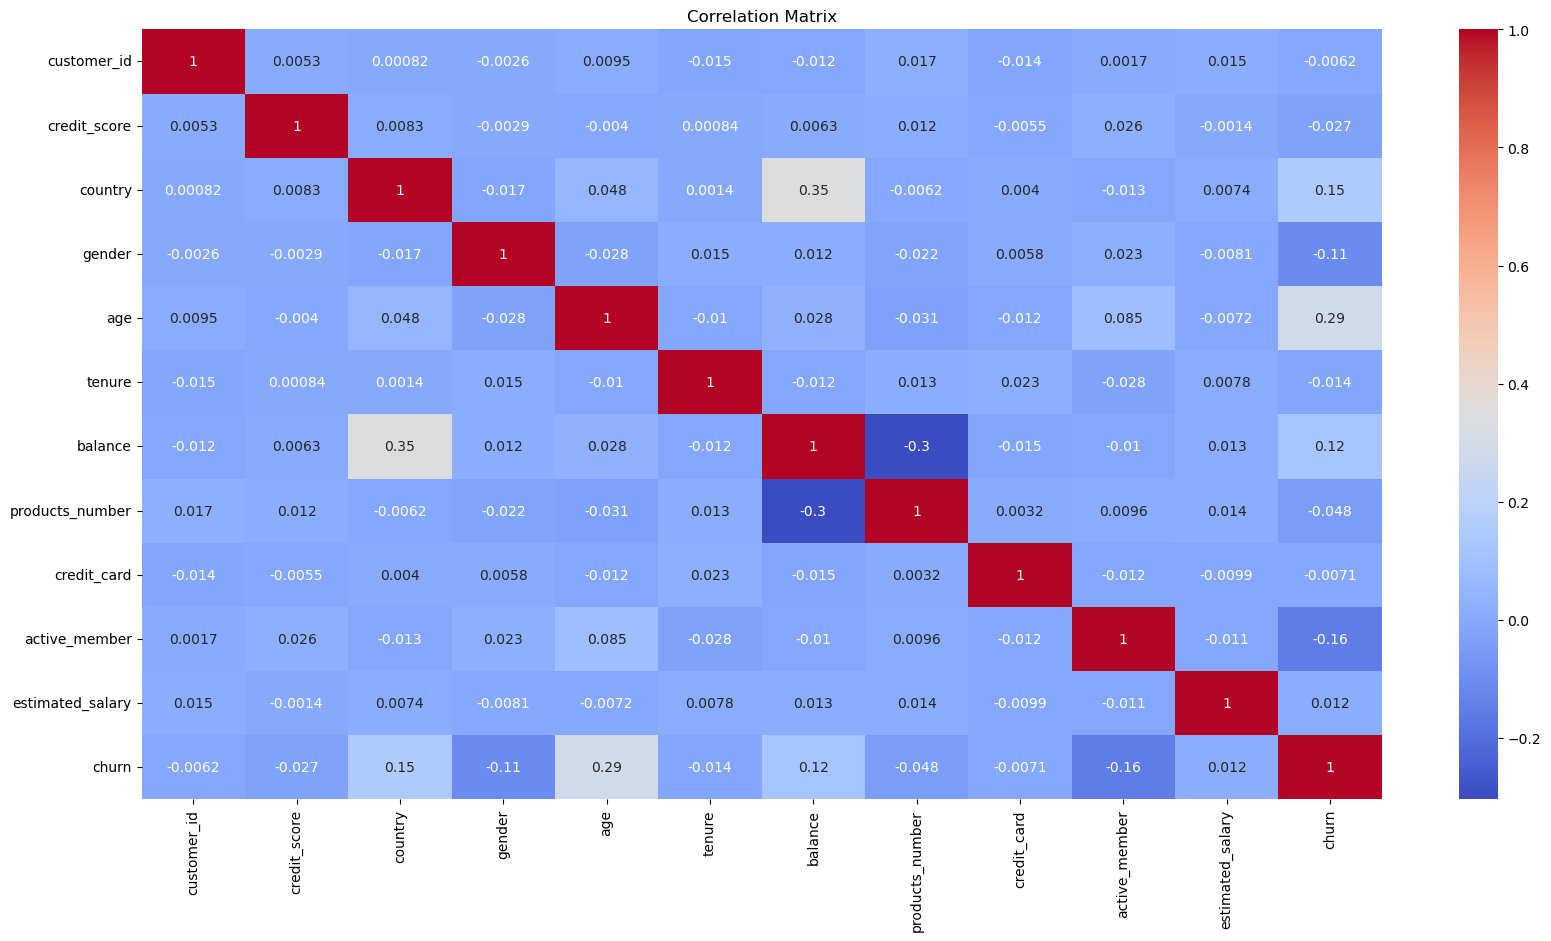

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

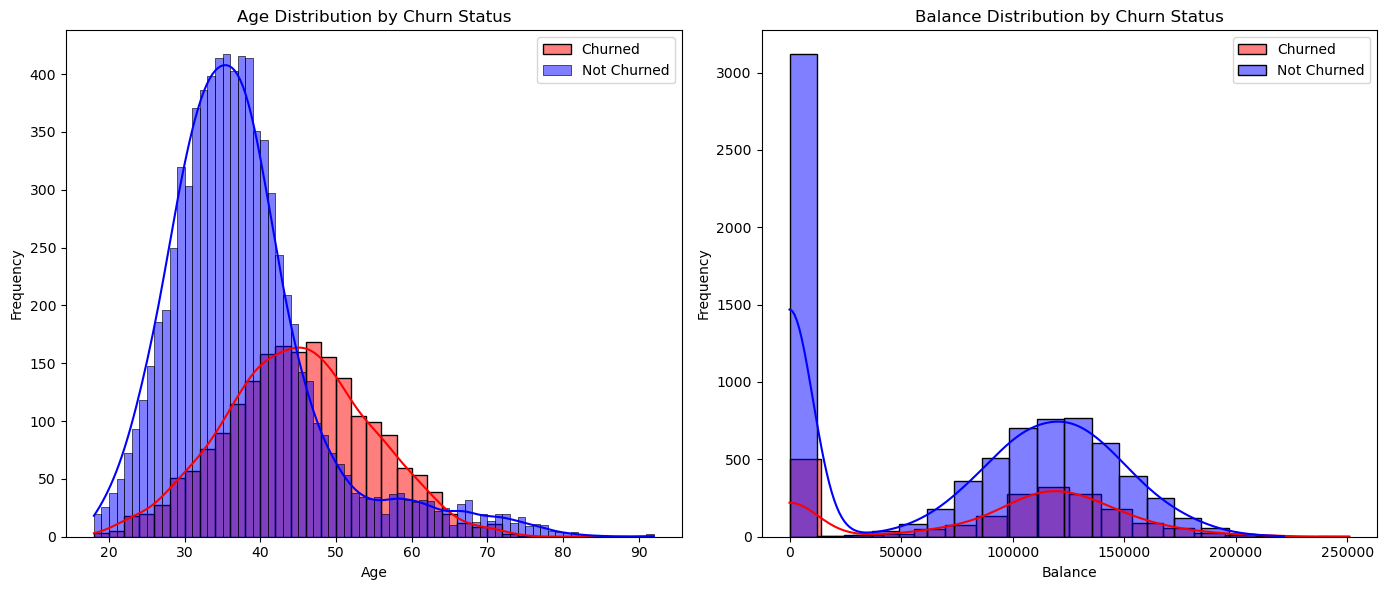

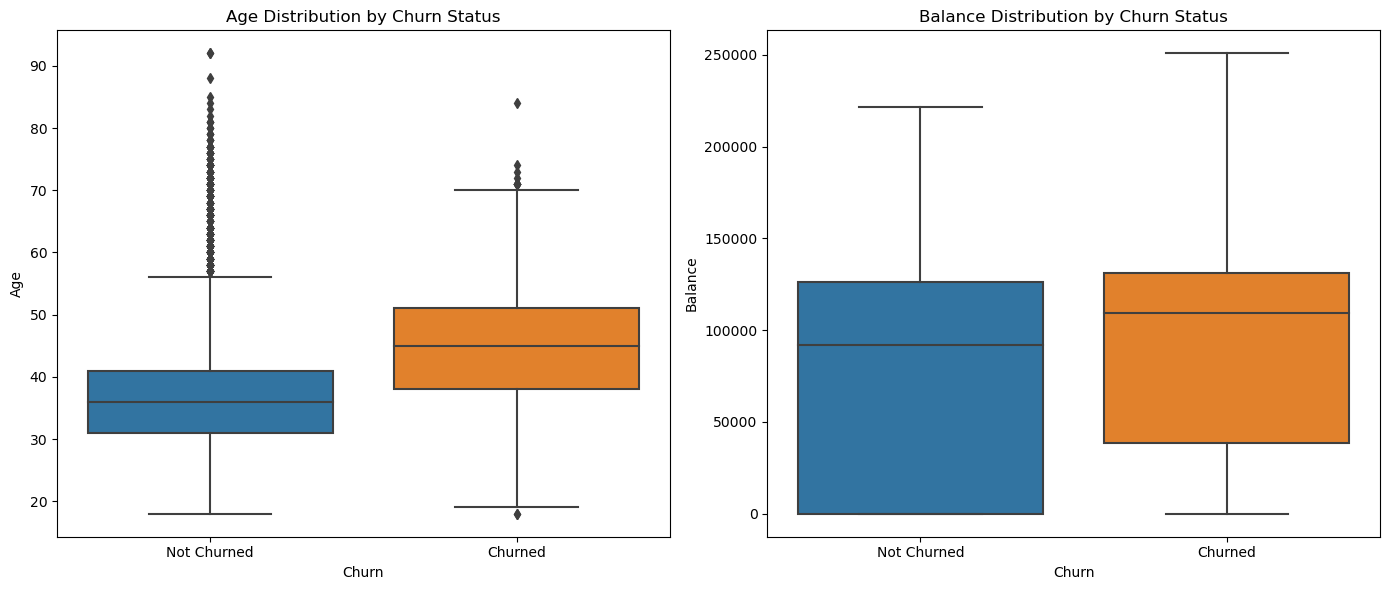

In [11]:
plt.figure(figsize=(14, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(df[df['churn'] == 1]['age'], color='red', label='Churned', kde=True)
sns.histplot(df[df['churn'] == 0]['age'], color='blue', label='Not Churned', kde=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Balance distribution
plt.subplot(1, 2, 2)
sns.histplot(df[df['churn'] == 1]['balance'], color='red', label='Churned', kde=True)
sns.histplot(df[df['churn'] == 0]['balance'], color='blue', label='Not Churned', kde=True)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(14, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='churn', y='age', data=df)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Churned', 'Churned'])

# Balance distribution
plt.subplot(1, 2, 2)
sns.boxplot(x='churn', y='balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

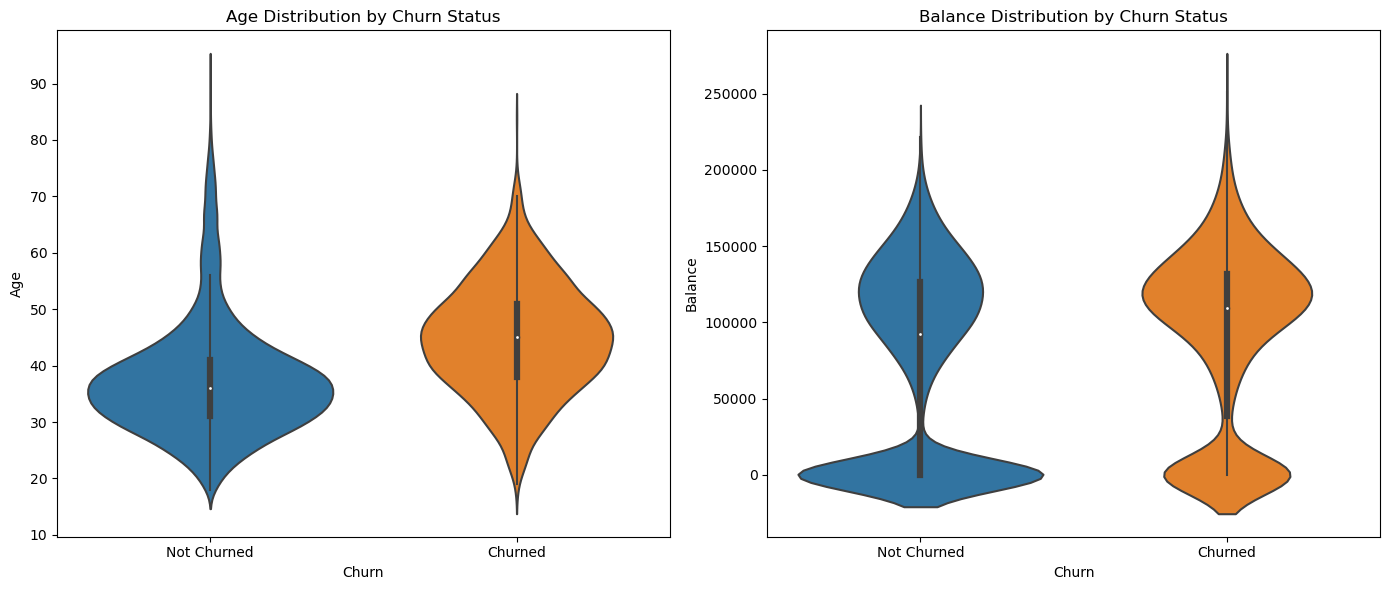

In [12]:
plt.figure(figsize=(14, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.violinplot(x='churn', y='age', data=df)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Churned', 'Churned'])

# Balance distribution
plt.subplot(1, 2, 2)
sns.violinplot(x='churn', y='balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

In [13]:
bins = [0, 18, 30, 40, 50, 60, 70, 100]  # Define your age ranges
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71+']  # Define labels for the age groups

# Create a new column in the DataFrame with the age group labels
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


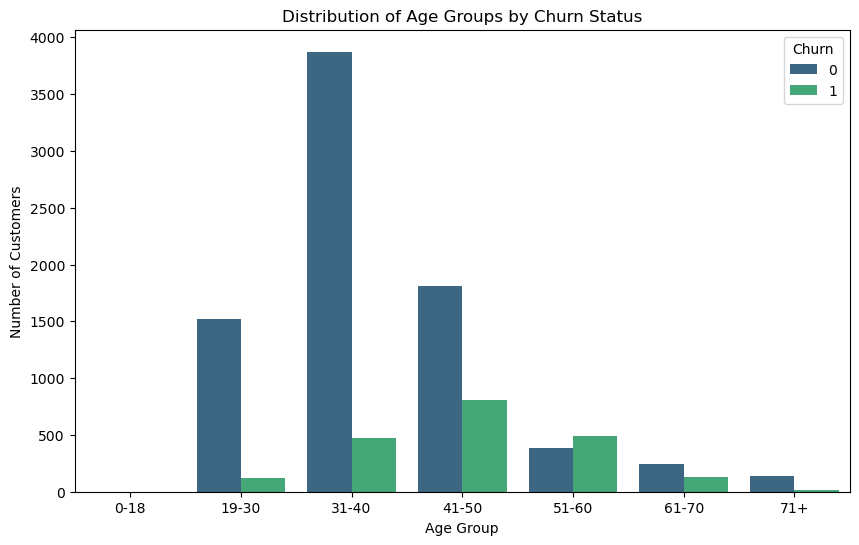

In [14]:

# Age distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='churn', data=df, palette='viridis')

# Add title and labels
plt.title('Distribution of Age Groups by Churn Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')

# Show the plot
plt.show()

In [15]:
df['balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

In [16]:
balance_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000]  # Define your balance ranges
balance_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k+']  # Define labels for the balance groups

# Create a new column in the DataFrame with the balance group labels
df['Balance_Group'] = pd.cut(df['balance'], bins=balance_bins, labels=balance_labels, right=False)

# Now you can perform analysis on the new 'Balance_Group' column
print(df.head()) 

   customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619        1       0   42       2       0.00   
1     15647311           608        2       0   41       1   83807.86   
2     15619304           502        1       0   42       8  159660.80   
3     15701354           699        1       0   39       1       0.00   
4     15737888           850        2       0   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  \
0                1            1              1         101348.88      1   
1                1            0              1         112542.58      0   
2                3            1              0         113931.57      1   
3                2            0              0          93826.63      0   
4                1            1              1          79084.10      0   

  Age_Group Balance_Group  
0     41-50         0-50k  
1     41-50      50k-100k  
2     41-50     150k-200k 

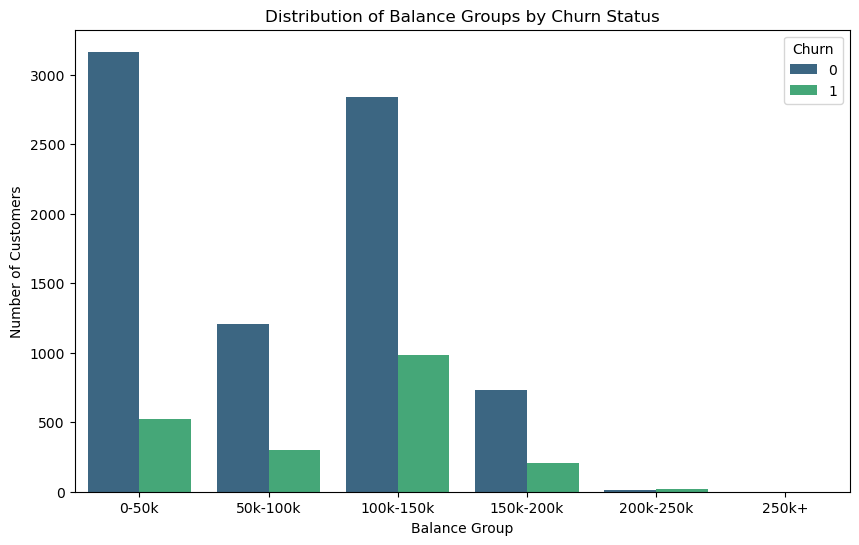

In [68]:
# balance distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Balance_Group', hue='churn', data=df, palette='viridis')

# Add title and labels
plt.title('Distribution of Balance Groups by Churn Status')
plt.xlabel('Balance Group')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')

# Show the plot
plt.show()

In [18]:
# Calculate  overall churn rate
churn_rate = df['churn'].mean() * 100  # Multiply by 100 to get the percentage
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 20.37%


In [19]:
# Calculate churn rate by Age_Group
age_group_churn_rate = df.groupby('Age_Group')['churn'].mean() * 100
print("Churn Rate by Age Group:")
print(age_group_churn_rate)

Churn Rate by Age Group:
Age_Group
0-18           NaN
19-30     7.556368
31-40    10.883571
41-50    30.786860
51-60    56.041427
61-70    35.200000
71+       9.933775
Name: churn, dtype: float64


In [20]:
# Calculate churn rate by Balance_Group
balance_group_churn_rate = df.groupby('Balance_Group')['churn'].mean() * 100
print("Churn Rate by Balance Group:")
print(balance_group_churn_rate)

Churn Rate by Balance Group:
Balance_Group
0-50k         14.247021
50k-100k      19.880716
100k-150k     25.770235
150k-200k     21.925134
200k-250k     54.545455
250k+        100.000000
Name: churn, dtype: float64


In [21]:
# Calculate churn rate by country
country_group_churn_rate = df.groupby('country')['churn'].mean() * 100
print("Churn Rate by country:")
print(country_group_churn_rate)

Churn Rate by country:
country
1    16.154767
2    16.673395
3    32.443204
Name: churn, dtype: float64


In [22]:
# To filter rows where the balance is greater than or equal to 200
filtered_df = df.loc[df['balance'] >= 250000]

filtered_df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Age_Group,Balance_Group
2092,15757408,655,2,1,38,3,250898.09,3,0,1,81054.0,1,31-40,250k+


In [23]:
# To filter rows where the balance is between 200,000 and 250,000
filtered_df = df.loc[(df['balance'] >= 200000) & (df['balance'] <= 250000)]

# Display the filtered data
filtered_df.shape

(33, 14)

In [24]:
filtered_age_df = df.loc[df['Age_Group'] == '51-60']
filtered_age_df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Age_Group,Balance_Group
6,15592531,822,1,1,50,7,0.00,2,1,1,10062.80,0,51-60,0-50k
16,15737452,653,3,1,58,1,132602.88,1,1,0,5097.67,1,51-60,100k-150k
41,15738148,465,1,0,51,8,122522.32,1,0,0,181297.65,1,51-60,100k-150k
59,15804771,614,1,1,51,4,40685.92,1,1,1,46775.28,0,51-60,0-50k
63,15751208,684,2,1,56,8,78707.16,1,1,1,99398.36,0,51-60,50k-100k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,15808971,693,2,0,57,9,0.00,2,1,1,135502.77,0,51-60,0-50k
9948,15735078,724,3,0,53,1,139687.66,2,1,1,12913.92,0,51-60,100k-150k
9975,15666295,610,3,1,50,1,113957.01,2,1,0,196526.55,1,51-60,100k-150k
9979,15692664,677,1,0,58,1,90022.85,1,0,1,2988.28,0,51-60,50k-100k


In [25]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'Age_Group', 'Balance_Group'],
      dtype='object')

In [26]:
# Group by Age_Group and active_member and then count the occurrences
age_active_counts = df.groupby(['Age_Group', 'active_member']).size().unstack()

# Display the counts
print("Counts of Active and Inactive Members by Age Group:")
print(age_active_counts)
# Show the plot
plt.show()

Counts of Active and Inactive Members by Age Group:
active_member     0     1
Age_Group                
0-18              0     0
19-30           804   837
31-40          2165  2181
41-50          1396  1222
51-60           373   496
61-70            94   281
71+              17   134


In [27]:
age_active_counts = df.groupby(['Balance_Group', 'active_member']).size().unstack()

# Display the counts
print("Counts of Active and Inactive Members by Age Group:")
print(age_active_counts)
# Show the plot
plt.show()

Counts of Active and Inactive Members by Age Group:
active_member     0     1
Balance_Group            
0-50k          1779  1913
50k-100k        714   795
100k-150k      1872  1958
150k-200k       465   470
200k-250k        19    14
250k+             0     1


In [28]:
# Create a new column that combines Age_Group and Balance_Group
df['Age_Balance_Group'] = df['Age_Group'].astype(str) + ' | ' + df['Balance_Group'].astype(str)

# Display the first few rows to check the new column
print(df[['Age_Group', 'Balance_Group', 'Age_Balance_Group']]   )

     Age_Group Balance_Group  Age_Balance_Group
0        41-50         0-50k      41-50 | 0-50k
1        41-50      50k-100k   41-50 | 50k-100k
2        41-50     150k-200k  41-50 | 150k-200k
3        31-40         0-50k      31-40 | 0-50k
4        41-50     100k-150k  41-50 | 100k-150k
...        ...           ...                ...
9995     31-40         0-50k      31-40 | 0-50k
9996     31-40      50k-100k   31-40 | 50k-100k
9997     31-40         0-50k      31-40 | 0-50k
9998     41-50      50k-100k   41-50 | 50k-100k
9999     19-30     100k-150k  19-30 | 100k-150k

[10000 rows x 3 columns]


In [29]:
df_age_balance = df.loc[(df['Age_Group'] == '51-60' ) & (df['Balance_Group'] == '150k-200k') & (df['churn'] == 1) & (df['active_member'] == 0)] 
df_age_balance

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Age_Group,Balance_Group,Age_Balance_Group
179,15625426,754,3,0,55,3,161608.81,1,1,0,8080.85,1,51-60,150k-200k,51-60 | 150k-200k
543,15705953,721,2,1,51,0,169312.13,1,1,0,109078.35,1,51-60,150k-200k,51-60 | 150k-200k
586,15722010,621,2,1,53,9,170491.84,1,1,0,35588.07,1,51-60,150k-200k,51-60 | 150k-200k
598,15637476,683,3,0,57,5,162448.69,1,0,0,9221.78,1,51-60,150k-200k,51-60 | 150k-200k
1323,15629244,635,2,1,50,7,159453.64,2,0,0,54560.79,1,51-60,150k-200k,51-60 | 150k-200k
1389,15684196,627,1,0,55,2,159441.27,1,1,0,100686.11,1,51-60,150k-200k,51-60 | 150k-200k
1837,15619343,561,1,1,56,7,152759.00,2,1,0,133167.11,1,51-60,150k-200k,51-60 | 150k-200k
2235,15633930,648,2,0,56,6,157559.59,2,1,0,140991.23,1,51-60,150k-200k,51-60 | 150k-200k
2395,15672374,672,1,1,52,8,170008.84,1,0,0,56407.42,1,51-60,150k-200k,51-60 | 150k-200k
2473,15679249,351,3,0,57,4,163146.46,1,1,0,169621.69,1,51-60,150k-200k,51-60 | 150k-200k


In [35]:
X = df.drop(['churn','Age_Balance_Group'], axis=1) 
y = df['churn']
X['Age_Group'] = X['Age_Group'].cat.codes
X['Balance_Group'] = X['Balance_Group'].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/Users/shalabhsinghyadav/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [23:58:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred = model.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.86
Confusion Matrix:
 [[1519   88]
 [ 192  201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [41]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

model = XGBClassifier(eval_metric='logloss')

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END 

Model after Hyper parameter tunning 


In [42]:
best_params = grid_search.best_params_

In [43]:
model = XGBClassifier(**best_params, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.864
Confusion Matrix:
 [[1543   64]
 [ 208  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



AUC Score: 0.8737378295656247


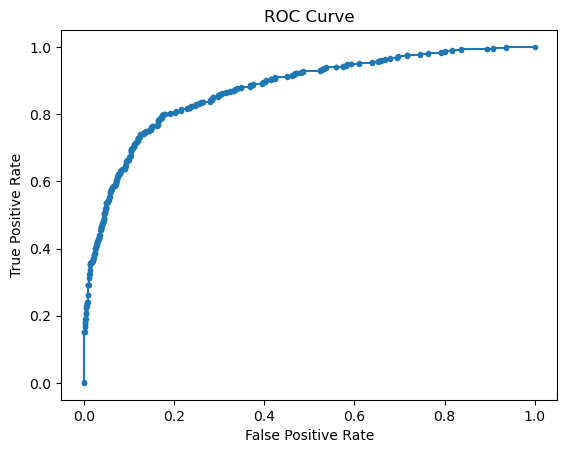

In [45]:

from sklearn.metrics import roc_auc_score, roc_curve

y_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

print("Stratified cross-validated accuracy scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Stratified cross-validated accuracy scores: [0.87125  0.86     0.86875  0.8625   0.855625]
Mean accuracy: 0.8636250000000001
Standard deviation: 0.005706356105256668


In [48]:
y_pred = model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Set Accuracy: 0.864
Confusion Matrix:
 [[1543   64]
 [ 208  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



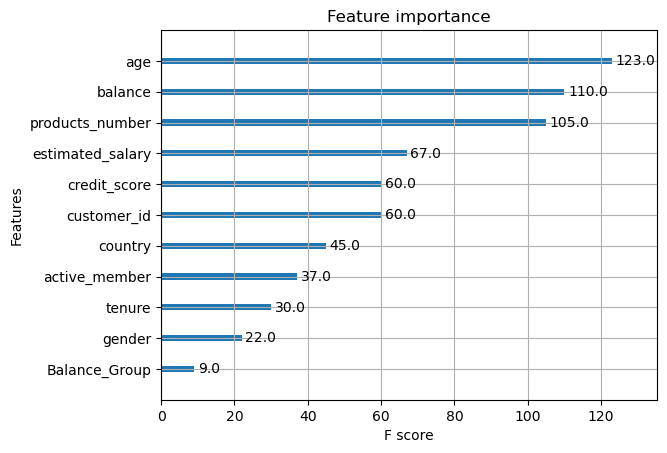

In [49]:
xgb.plot_importance(model)
plt.show()

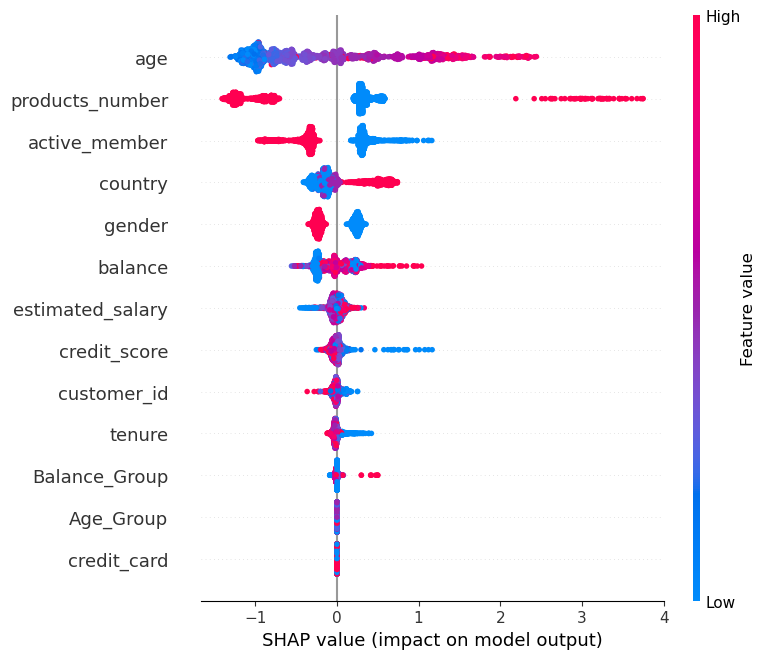

In [53]:

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

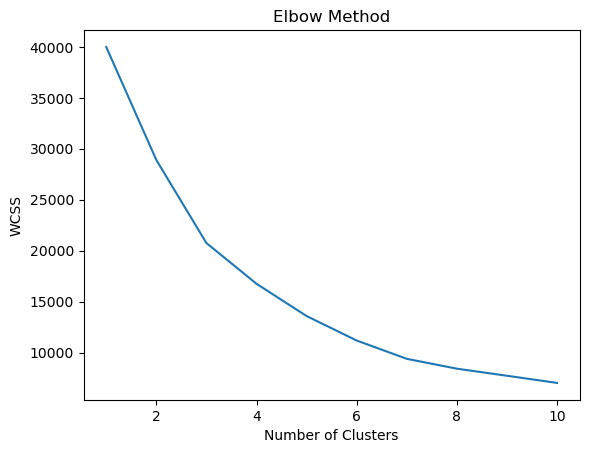

In [65]:
churn_probabilities = model.predict_proba(X)[:, 1]
df['churn_probability'] = churn_probabilities
features = ['age', 'balance', 'products_number', 'churn_probability']
X_clustering = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



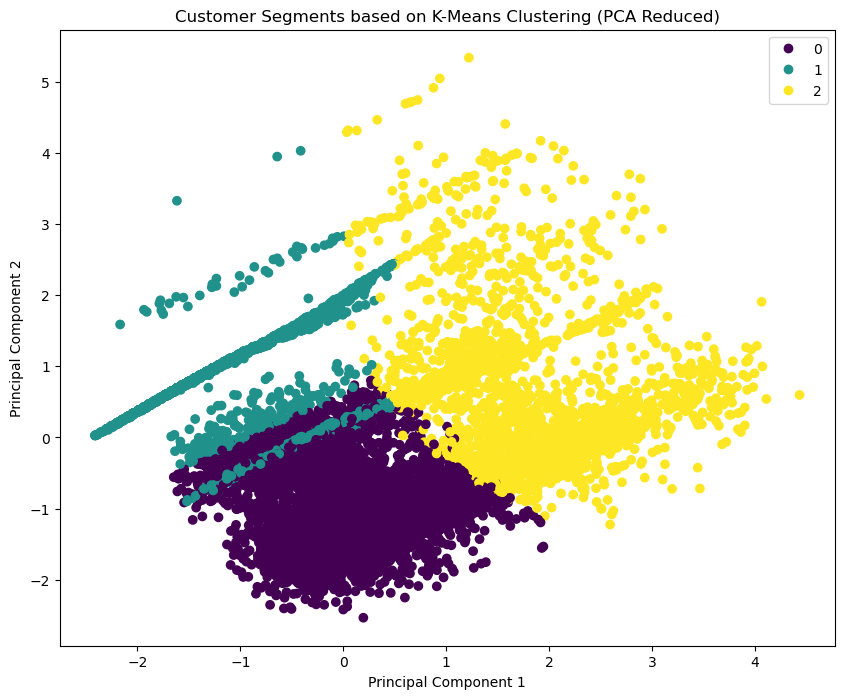

In [66]:
from sklearn.decomposition import PCA
# Apply K-Means with the optimal number of clusters (assume it's 3 based on the elbow plot)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=set(df['Cluster']))
plt.title('Customer Segments based on K-Means Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [67]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

          customer_id  credit_score   country    gender        age    tenure  \
Cluster                                                                        
0        1.569108e+07    653.051432  1.898714  0.576585  34.424092  4.964133   
1        1.569129e+07    650.635748  1.385159  0.558893  36.316843  5.099823   
2        1.569012e+07    645.210502  2.014740  0.461999  52.180562  4.976048   

               balance  products_number  credit_card  active_member  \
Cluster                                                               
0        122671.649156         1.327995     0.703812       0.529213   
1          4789.113607         1.845112     0.711131       0.535041   
2         94330.558434         1.450484     0.700138       0.455090   

         estimated_salary     churn  churn_probability  
Cluster                                                 
0           101209.603751  0.123618           0.132589  
1            98973.621251  0.068316           0.076638  
2            99

/var/folders/hl/lt5qxlwj14sb5zfmg4qdlc1c0000gn/T/ipykernel_4683/1706754257.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


Strategic Recommendations:

1.	Cluster 0 (Purple):

	•	**Focus**: Loyalty programs and upselling strategies.
	
	•	**Action**: Offer exclusive benefits to retain high-balance customers and encourage them to expand their relationship with the bank.



2.	Cluster 1 (Teal):

	•	**Focus**: Maintain engagement and product use.

	•	**Action**: Continue to provide personalized product recommendations and services that keep these customers engaged. Highlight the value they are getting from multiple products.




3.	Cluster 2 (Yellow):

	•	**Focus**: Retention and re-engagement.
	
	•	**Action**: Implement retention campaigns, such as personalized communication and special offers, to re-engage this high-risk group. Consider reaching out with personalized financial advice or solutions tailored to older customers.


 